In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import math

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
163802,289883,0,Cash loans,F,N,Y,0,225000.0,1223010.0,48627.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
101700,218073,0,Cash loans,F,N,Y,0,58500.0,278811.0,11943.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
75006,186989,1,Cash loans,M,Y,Y,0,202500.0,454500.0,21996.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
60878,170604,0,Cash loans,F,N,Y,1,247500.0,669600.0,26685.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
205271,337945,0,Cash loans,M,N,N,0,135000.0,207000.0,13477.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
cat_cols = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
num_cols = [col for col in df.columns if col not in cat_cols]
df[cat_cols] = df[cat_cols].astype(object)

In [6]:
df[num_cols].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers 

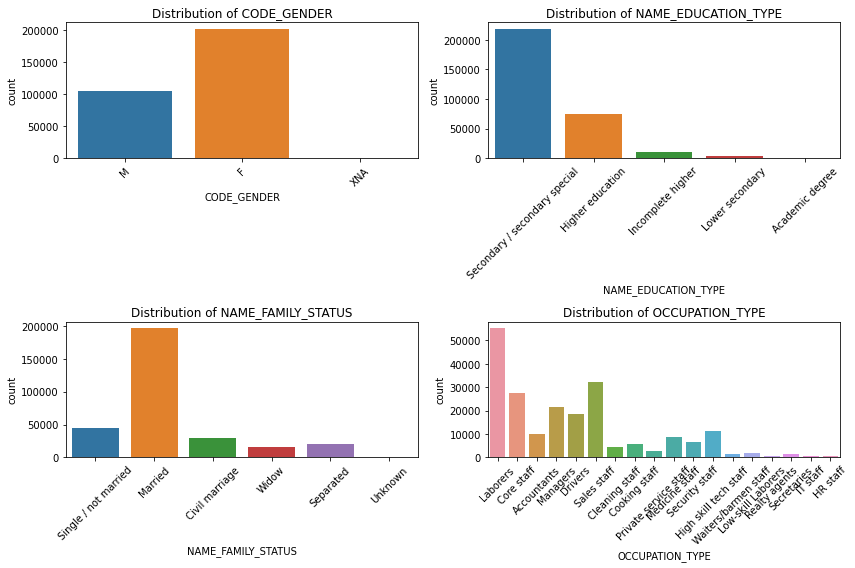

In [8]:
# Visualisasi distribusi data kategorikal
plt.figure(figsize=(12, 8))
for col in cat_cols:
    plt.subplot(2, 2, cat_cols.index(col) + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

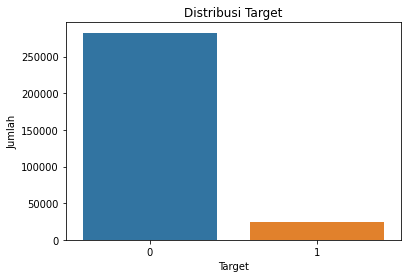

Statistik Ringkasan Distribusi Target:
0    282686
1     24825
Name: TARGET, dtype: int64


In [9]:
# Analisis distribusi target
target_distribution = df['TARGET'].value_counts()

# Visualisasi distribusi target menggunakan bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TARGET')
plt.title("Distribusi Target")
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.show()

# Print statistik ringkasan distribusi target
print("Statistik Ringkasan Distribusi Target:")
print(target_distribution)

Dalam analisis kami terhadap distribusi target, kami menemukan bahwa terdapat ketidakseimbangan yang signifikan. Dari total data, 282,686 pengajuan pinjaman memiliki status 'pelunasan berhasil' (0), sementara hanya ada 24,825 pengajuan dengan status 'pelunasan gagal' (1). Ketidakseimbangan ini dapat mempengaruhi performa model prediksi kami. Kami perlu mengambil langkah-langkah khusus untuk mengatasi ketidakseimbangan ini guna mendapatkan hasil prediksi yang lebih baik.

No handles with labels found to put in legend.


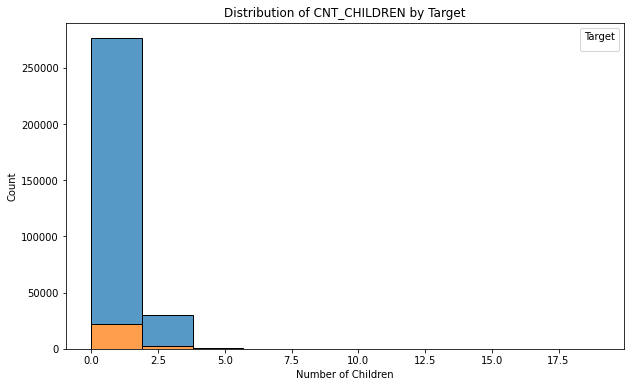

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CNT_CHILDREN', hue='TARGET', multiple='stack', bins=10)
plt.title('Distribution of CNT_CHILDREN by Target')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

Dapat dilihat bahwa pelanggan yang cenderung memiliki sedikit anak tidak punya kesulitan membayar

No handles with labels found to put in legend.


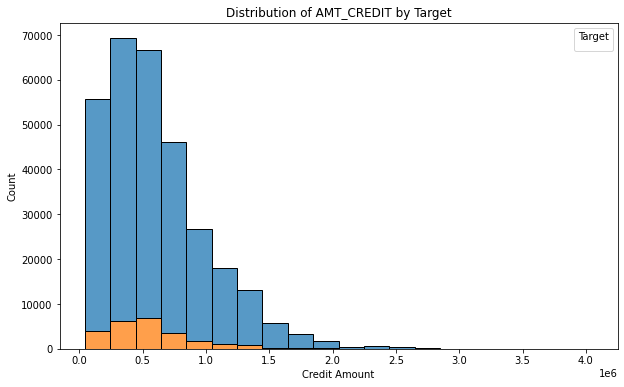

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AMT_CREDIT', hue='TARGET', multiple='stack', bins=20)
plt.title('Distribution of AMT_CREDIT by Target')
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


Dapat dilihat bahwa pelanggan yang cenderung jarang mengajukan kredit lebih mudah membayar

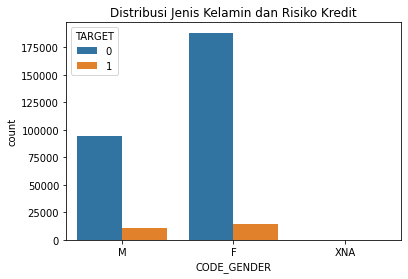

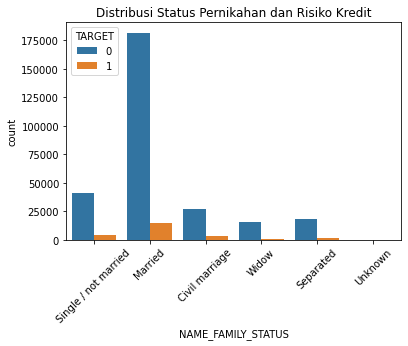

In [12]:
# Analisis Profil Pelanggan
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)
plt.title('Distribusi Jenis Kelamin dan Risiko Kredit')
plt.show()

sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=df)
plt.title('Distribusi Status Pernikahan dan Risiko Kredit')
plt.xticks(rotation=45)
plt.show()

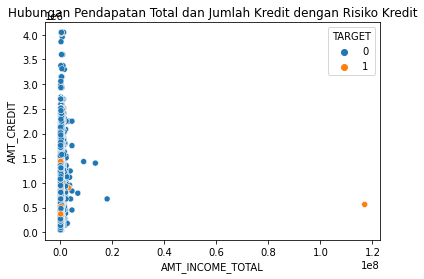

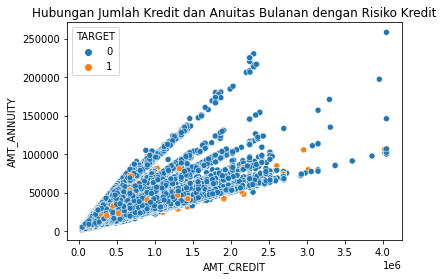

In [13]:
# Analisis Hubungan Finansial
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=df)
plt.title('Hubungan Pendapatan Total dan Jumlah Kredit dengan Risiko Kredit')
plt.show()

sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', hue='TARGET', data=df)
plt.title('Hubungan Jumlah Kredit dan Anuitas Bulanan dengan Risiko Kredit')
plt.show()

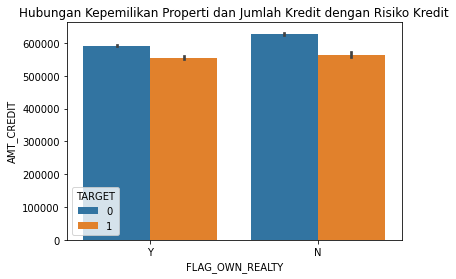

In [14]:
# Analisis Properti
sns.barplot(x='FLAG_OWN_REALTY', y='AMT_CREDIT', hue='TARGET', data=df)
plt.title('Hubungan Kepemilikan Properti dan Jumlah Kredit dengan Risiko Kredit')
plt.show()

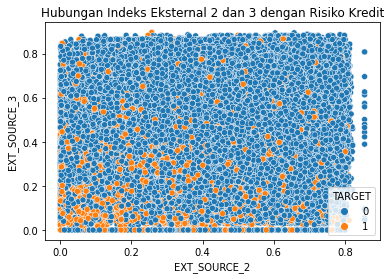

In [15]:
# Analisis Eksternal dan Indeks Kredit
sns.scatterplot(x='EXT_SOURCE_2', y='EXT_SOURCE_3', hue='TARGET', data=df)
plt.title('Hubungan Indeks Eksternal 2 dan 3 dengan Risiko Kredit')
plt.show()


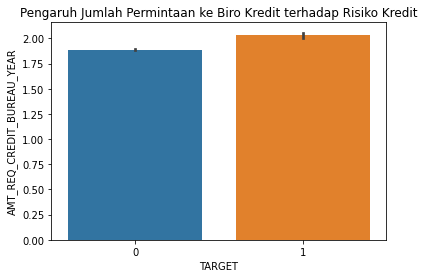

In [16]:
# Analisis Biro Kredit
sns.barplot(x='TARGET', y='AMT_REQ_CREDIT_BUREAU_YEAR', data=df)
plt.title('Pengaruh Jumlah Permintaan ke Biro Kredit terhadap Risiko Kredit')
plt.show()

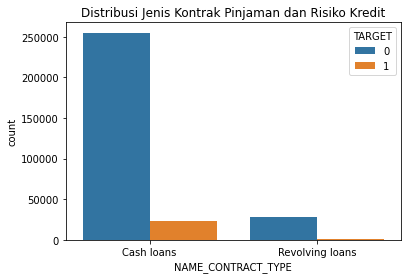

In [17]:
# Analisis Jenis Kontrak Pinjaman
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df)
plt.title('Distribusi Jenis Kontrak Pinjaman dan Risiko Kredit')
plt.show()


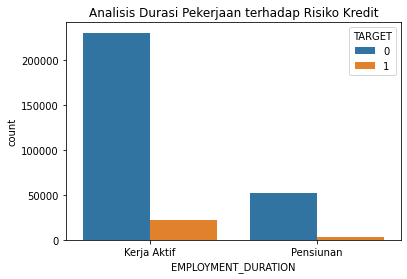

In [18]:
# Analisis Durasi Pekerjaan
df['EMPLOYMENT_DURATION'] = df['DAYS_EMPLOYED'].apply(lambda x: 'Pensiunan' if x == 365243 else 'Kerja Aktif')
sns.countplot(x='EMPLOYMENT_DURATION', hue='TARGET', data=df)
plt.title('Analisis Durasi Pekerjaan terhadap Risiko Kredit')
plt.show()

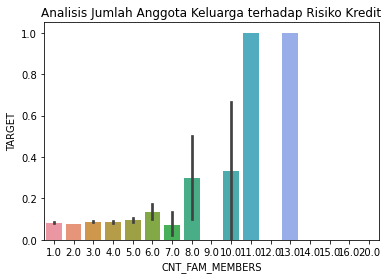

In [19]:
# Analisis Jumlah Anggota Keluarga
sns.barplot(x='CNT_FAM_MEMBERS', y='TARGET', data=df)
plt.title('Analisis Jumlah Anggota Keluarga terhadap Risiko Kredit')
plt.show()

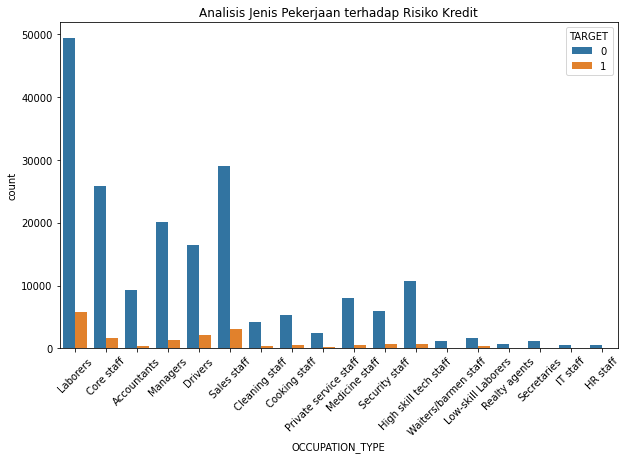

In [20]:
# Analisis Jenis Pekerjaan
plt.figure(figsize=(10, 6))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=df)
plt.xticks(rotation=45)
plt.title('Analisis Jenis Pekerjaan terhadap Risiko Kredit')
plt.show()

In [21]:
# Menghitung jumlah pengajuan dan persentase pengajuan yang diterima berdasarkan jenis pekerjaan
occupation_approval = df.groupby('OCCUPATION_TYPE')['TARGET'].agg(['count', 'mean']).reset_index()
occupation_approval.columns = ['OCCUPATION_TYPE', 'APPLICATION_COUNT', 'APPROVAL_RATE']

# Mengurutkan berdasarkan persentase pengajuan yang diterima (tertinggi ke terendah)
occupation_approval_sorted = occupation_approval.sort_values(by='APPROVAL_RATE', ascending=False)

# Mendapatkan jenis pekerjaan dengan presentase pengajuan tertinggi
highest_approval_occupation = occupation_approval_sorted.iloc[0]

print("Jenis Pekerjaan dengan Presentase Pengajuan Paling Tinggi:")
print("--------------------------------------------------------")
print("Jenis Pekerjaan:", highest_approval_occupation['OCCUPATION_TYPE'])
print("Presentase Pengajuan:", highest_approval_occupation['APPROVAL_RATE'] * 100, "%")
print("Jumlah Pengajuan:", highest_approval_occupation['APPLICATION_COUNT'])

Jenis Pekerjaan dengan Presentase Pengajuan Paling Tinggi:
--------------------------------------------------------
Jenis Pekerjaan: Low-skill Laborers
Presentase Pengajuan: 17.152412804586717 %
Jumlah Pengajuan: 2093


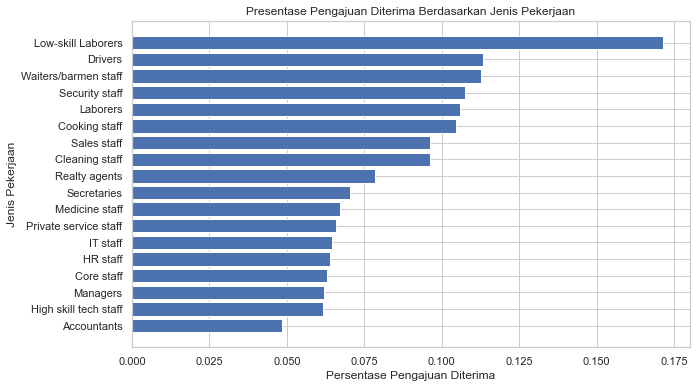

In [79]:
# Membuat plot bar
plt.figure(figsize=(10, 6))
plt.barh(occupation_approval_sorted['OCCUPATION_TYPE'], occupation_approval_sorted['APPROVAL_RATE'])
plt.xlabel('Persentase Pengajuan Diterima')
plt.ylabel('Jenis Pekerjaan')
plt.title('Presentase Pengajuan Diterima Berdasarkan Jenis Pekerjaan')
plt.gca().invert_yaxis()  # Membalik urutan jenis pekerjaan
plt.show()

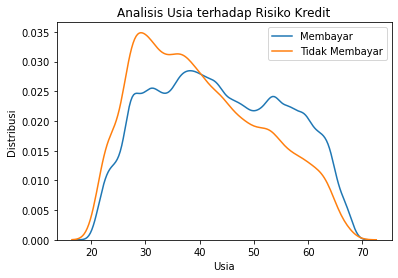

In [22]:
# Analisis Usia Penerima Pinjaman
df['AGE'] = -df['DAYS_BIRTH'] // 365
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AGE'], label='Membayar')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AGE'], label='Tidak Membayar')
plt.xlabel('Usia')
plt.ylabel('Distribusi')
plt.title('Analisis Usia terhadap Risiko Kredit')
plt.legend()
plt.show()

In [23]:
# Memilih hanya kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Menghitung statistik ringkasan
summary_statistics = numeric_columns.describe()

print(summary_statistics)

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

SK_ID_CURR: Ini adalah ID unik untuk setiap pelanggan. Distribusi ID unik ini akan bervariasi dari 100002 hingga 456255.

TARGET: Ini adalah target yang ingin diprediksi. Distribusi 0 dan 1 menunjukkan bahwa mayoritas pelanggan berhasil melunasi pinjaman (0), sementara sebagian kecil mengalami gagal pelunasan (1).

CNT_CHILDREN: Ini adalah jumlah anak yang dimiliki oleh pelanggan. Rata-rata jumlah anak adalah sekitar 0.42 dengan deviasi standar sekitar 0.72, menunjukkan variasi yang signifikan.

AMT_INCOME_TOTAL: Ini adalah total pendapatan tahunan pelanggan. Rata-rata pendapatan adalah sekitar 168,798 dengan deviasi standar yang cukup besar, menunjukkan variasi yang luas dalam pendapatan.

AMT_CREDIT: Ini adalah jumlah kredit yang diajukan oleh pelanggan. Rata-rata jumlah kredit adalah sekitar 599,026 dengan deviasi standar sekitar 402,490.

AMT_ANNUITY: Ini adalah jumlah angsuran yang harus dibayarkan setiap bulan. Rata-rata angsuran adalah sekitar 27,108 dengan deviasi standar sekitar 14,493.

AMT_GOODS_PRICE: Ini adalah harga barang yang dibiayai oleh kredit. Rata-rata harga barang adalah sekitar 538,396 dengan deviasi standar sekitar 369,446.

REGION_POPULATION_RELATIVE: Ini adalah angka relatif populasi wilayah tempat pelanggan tinggal. Rata-rata angka relatif populasi adalah sekitar 0.02 dengan deviasi standar sekitar 0.01.

DAYS_BIRTH: Ini adalah jumlah hari sejak pelanggan lahir. Nilai negatif menunjukkan usia pelanggan. Rata-rata usia pelanggan adalah sekitar 44 tahun.

DAYS_EMPLOYED: Ini adalah jumlah hari sejak pelanggan mulai bekerja. Nilai positif atau nol menunjukkan bahwa pelanggan sedang atau telah bekerja. Ada nilai maksimum yang sangat besar (365243) yang mungkin merupakan nilai sentinels untuk data yang hilang.

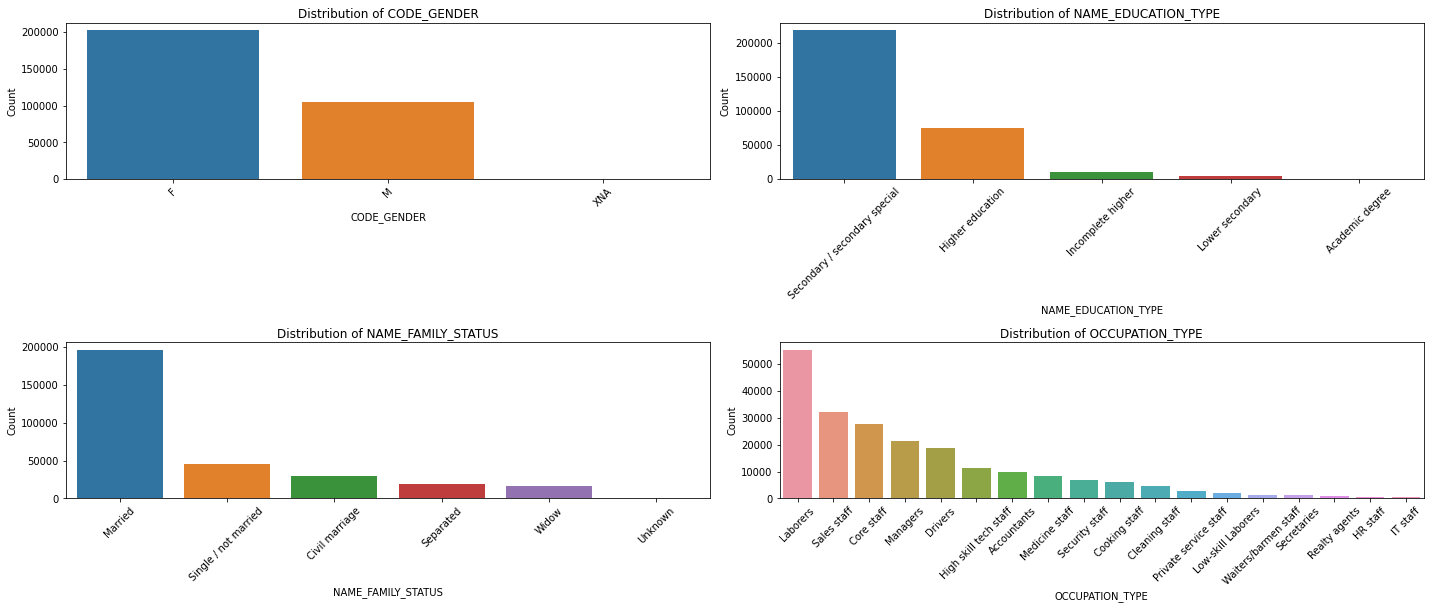

In [24]:
# List of categorical features to visualize
categorical_features = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']


# Set up the plot grid
plt.figure(figsize=(20, 16))
grid_rows = len(categorical_features)
grid_cols = 2  # You can change this based on the number of columns you want

for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(grid_rows, grid_cols, i)
    
    # Count the occurrences of each category
    category_counts = df[feature].value_counts()
    
    # Create a bar plot
    sns.barplot(x=category_counts.index, y=category_counts.values)
    
    # Customize the plot
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.tight_layout()
plt.show()

lorem ipsum

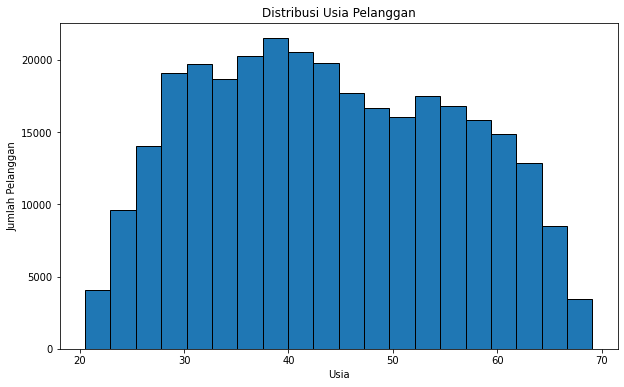

In [25]:
# Mengubah DAYS_BIRTH menjadi usia positif (dalam tahun)
df['AGE'] = -df['DAYS_BIRTH'] / 365
df.drop(columns= 'DAYS_BIRTH', inplace=True)

# Analisis distribusi usia pelanggan
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=20, edgecolor='k')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Usia Pelanggan')
plt.show()

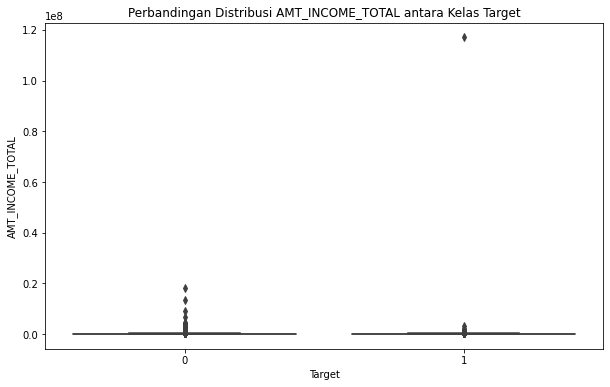

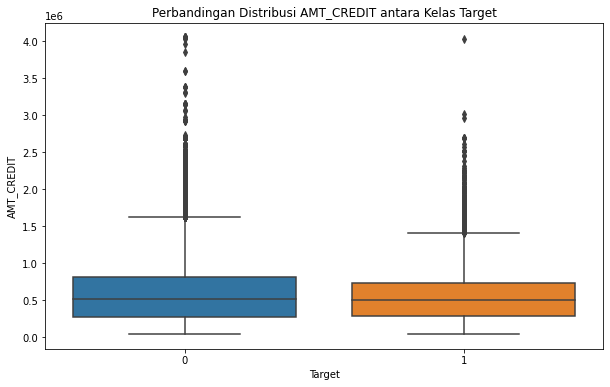

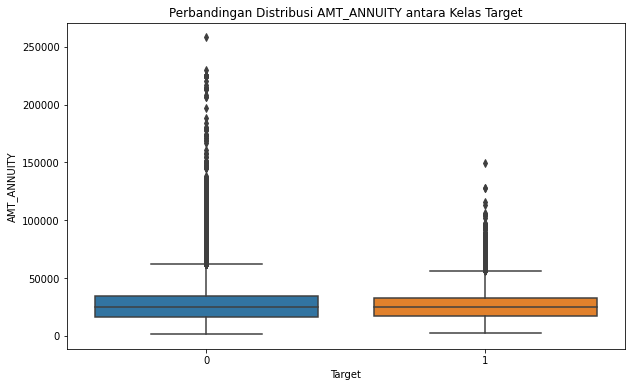

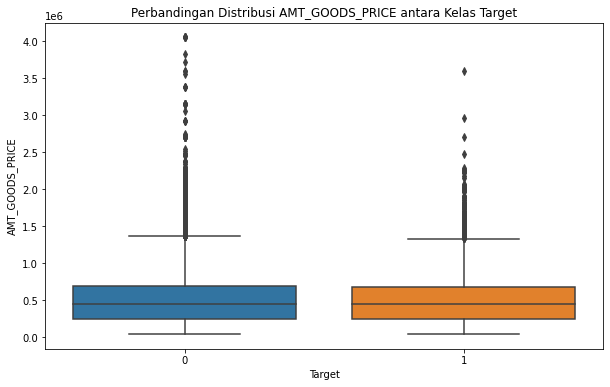

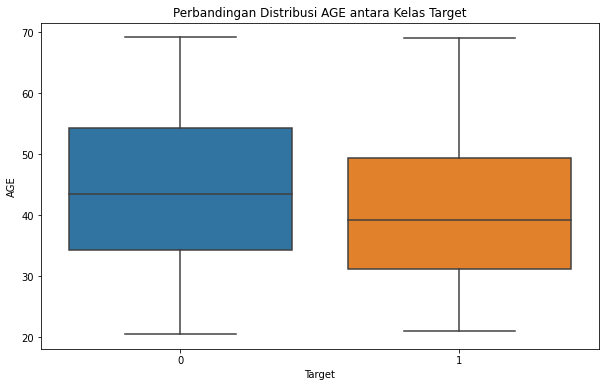

TARGET                             0             1
AMT_INCOME_TOTAL count  2.826860e+05  2.482500e+04
                 mean   1.690777e+05  1.656118e+05
                 std    1.104763e+05  7.466770e+05
                 min    2.565000e+04  2.565000e+04
                 25%    1.125000e+05  1.125000e+05
                 50%    1.485000e+05  1.350000e+05
                 75%    2.025000e+05  2.025000e+05
                 max    1.800009e+07  1.170000e+08
AMT_CREDIT       count  2.826860e+05  2.482500e+04
                 mean   6.026483e+05  5.577785e+05
                 std    4.068459e+05  3.464332e+05
                 min    4.500000e+04  4.500000e+04
                 25%    2.700000e+05  2.844000e+05
                 50%    5.177880e+05  4.975200e+05
                 75%    8.100000e+05  7.333155e+05
                 max    4.050000e+06  4.027680e+06
AMT_ANNUITY      count  2.826740e+05  2.482500e+04
                 mean   2.716362e+04  2.648174e+04
                 std    1.46583

In [26]:
# Memilih fitur numerik yang akan dibandingkan
numeric_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AGE']

# Membandingkan distribusi fitur numerik berdasarkan target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET', y=feature, data=df)
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.title(f'Perbandingan Distribusi {feature} antara Kelas Target')
    plt.show()

# Membandingkan statistik ringkasan fitur numerik berdasarkan target
summary_by_target = df.groupby('TARGET')[numeric_features].describe().transpose()
print(summary_by_target)

In [27]:
age_cat = []
for i in df['AGE']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

df['Age_category'] = age_cat

In [28]:
# Mengelompokkan berdasarkan TARGET dan kategori usia, menghitung jumlah pelanggan
age_grouped = df.groupby(['TARGET', 'Age_category'])['CODE_GENDER'].count().reset_index().sort_values('Age_category').reset_index()
age_grouped.rename(columns={'CODE_GENDER': 'Customers'}, inplace=True)
age_grouped.drop(columns='index', inplace=True)

# Menghitung total pelanggan dalam setiap kelompok usia
total_customers_by_age = age_grouped.groupby('Age_category')['Customers'].transform('sum')

# Menghitung persentase pelanggan untuk setiap kategori usia dalam setiap kelompok TARGET
age_grouped['Percentage'] = age_grouped['Customers'] / total_customers_by_age

# Mengubah nilai TARGET menjadi keterangan yang lebih deskriptif
mapping_target = {
    1: 'Have Problem',
    0: 'No Problem'
}
age_grouped['TARGET'] = age_grouped['TARGET'].map(mapping_target)

# Menampilkan hasil
print(age_grouped)

         TARGET Age_category  Customers  Percentage
0    No Problem        Adult     108678    0.920368
1  Have Problem        Adult       9403    0.079632
2    No Problem        Older      91718    0.943727
3  Have Problem        Older       5469    0.056273
4    No Problem  Young Adult      82290    0.892100
5  Have Problem  Young Adult       9953    0.107900


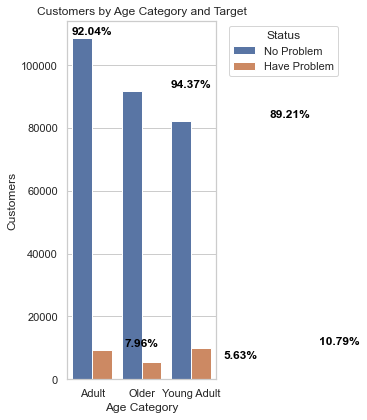

In [29]:
# Visualisasi grafik batang
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Age_category', y='Customers', hue='TARGET', data=age_grouped)
plt.xlabel('Age Category')
plt.ylabel('Customers')
plt.title('Customers by Age Category and Target')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan persentase di atas batang
for i, (v, pct) in enumerate(zip(age_grouped['Customers'], age_grouped['Percentage'])):
    plt.text(i, v + 1000, f'{pct*100:.2f}%', color='black', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

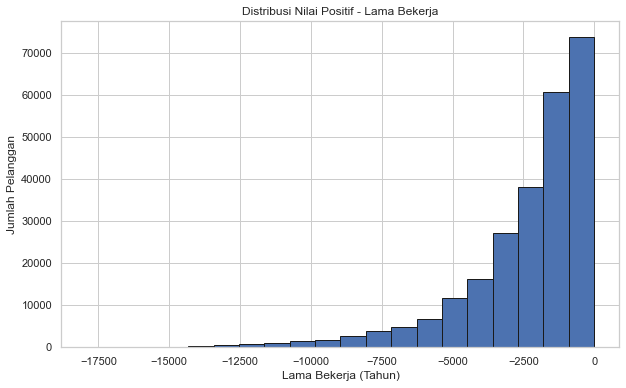

In [30]:
# mengubah nilai negatif pada kolom DAYS_EMPLOYED
#df['DAYS_WORKING'] = -df['DAYS_EMPLOYED'] / 365
#df.drop(columns='DAYS_EMPLOYED', inplace=True)

# Menganalisis distribusi nilai negatif
positive_employment = df[df['DAYS_EMPLOYED'] < 0]

plt.figure(figsize=(10, 6))
plt.hist(positive_employment['DAYS_EMPLOYED'], bins=20, edgecolor='k')
plt.xlabel('Lama Bekerja (Tahun)')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Nilai Positif - Lama Bekerja')
plt.show()

In [31]:
ot = df.groupby(['TARGET', 'OCCUPATION_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by=['OCCUPATION_TYPE', 'TARGET'])
ot.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

name_of_ot = list(ot['OCCUPATION_TYPE'].unique())
percentage = []

for i in name_of_ot:
    data = ot[ot['OCCUPATION_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

ot['percentage'] = percentage
ot

,TARGET,OCCUPATION_TYPE,Customers,percentage
0,0,Accountants,9339,0.95
18,1,Accountants,474,0.05
1,0,Cleaning staff,4206,0.90
19,1,Cleaning staff,447,0.10
2,0,Cooking staff,5325,0.90
20,1,Cooking staff,621,0.10
3,0,Core staff,25832,0.94
21,1,Core staff,1738,0.06
4,0,Drivers,16496,0.89
22,1,Drivers,2107,0.11


In [32]:
itc = df.groupby(['TARGET', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE']).reset_index()
itc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
itc.drop(columns = 'index', inplace=True)

income_type   = list(itc['NAME_INCOME_TYPE'].unique())
percentage  = []

for i in income_type:
    data = itc[itc.NAME_INCOME_TYPE == i]
    contract_type = list(data['NAME_CONTRACT_TYPE'].unique())
    for x in contract_type:
        data2 = data[data.NAME_CONTRACT_TYPE == x]
        total = data2['Customers'].sum()
        for y,z in enumerate(data2['Customers']):
            pct = round(z / total, 2)
            percentage.append(pct)
            
itc['percentage'] = percentage
itc

,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,Customers,percentage
0,0,Businessman,Revolving loans,10,1.00
1,0,Commercial associate,Cash loans,58662,0.92
2,1,Commercial associate,Cash loans,4990,0.08
3,0,Commercial associate,Revolving loans,7595,0.95
4,1,Commercial associate,Revolving loans,370,0.05
5,1,Maternity leave,Cash loans,2,1.00
6,0,Maternity leave,Revolving loans,3,1.00
7,0,Pensioner,Cash loans,49151,0.95
8,1,Pensioner,Cash loans,2842,0.05
9,0,Pensioner,Revolving loans,3229,0.96


In [33]:
# Menghitung jumlah pelanggan dan persentase untuk setiap nilai TARGET
target_counts = df['TARGET'].value_counts()
total_customers = len(df)
target_percentages = target_counts / total_customers

# Membuat DataFrame baru untuk hasil
result_df = pd.DataFrame({
    'TARGET': target_counts.index,
    'Customers': target_counts.values,
    'Customers_pct': target_percentages.values
})

# Menampilkan hasil
print(result_df)

   TARGET  Customers  Customers_pct
0       0     282686       0.919271
1       1      24825       0.080729


In [34]:
# Mapping values to simplify categories
marital_mapping = {
    'Married': 'Married',
    'Single / not married': 'Unmarried',
    'Civil marriage': 'Married',
    'Separated': 'Unmarried',
    'Widow': 'Unmarried',
    'Unknown': 'Unmarried'
}

# Applying the mapping to the column
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].map(marital_mapping)

# Displaying the new column values
print(df['NAME_FAMILY_STATUS'].value_counts())

Married      226207
Unmarried     81304
Name: NAME_FAMILY_STATUS, dtype: int64


In [35]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EMPLOYMENT_DURATION,AGE,Age_category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,Kerja Aktif,25.920548,Young Adult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Kerja Aktif,45.931507,Adult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Kerja Aktif,52.180822,Older
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Kerja Aktif,52.068493,Older
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Kerja Aktif,54.608219,Older


# Data Preprocessing

In [36]:
# Mengecek dan menghapus baris duplikat berdasarkan semua kolom
df_deduplicated = df.drop_duplicates()

# Menghitung jumlah baris sebelum dan setelah deduplication
total_rows_before = df.shape[0]
total_rows_after = df_deduplicated.shape[0]

print(f"Jumlah baris sebelum deduplication: {total_rows_before}")
print(f"Jumlah baris setelah deduplication: {total_rows_after}")


Jumlah baris sebelum deduplication: 307511
Jumlah baris setelah deduplication: 307511


In [37]:
# Menghitung persentase missing value untuk setiap kolom
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Memilih kolom yang memiliki missing value lebih dari 30%
columns_with_missing = missing_percentage[missing_percentage > 30]

# Membuat DataFrame untuk menampilkan hasil
missing_data_df = pd.DataFrame(columns=['Column', 'Missing Percentage'])
missing_data_df['Column'] = columns_with_missing.index
missing_data_df['Missing Percentage'] = columns_with_missing.values

# Menampilkan tabel kolom-kolom dengan missing value lebih dari 30%
print(missing_data_df)

                          Column  Missing Percentage
0                    OWN_CAR_AGE           65.990810
1                OCCUPATION_TYPE           31.345545
2                   EXT_SOURCE_1           56.381073
3                 APARTMENTS_AVG           50.749729
4               BASEMENTAREA_AVG           58.515956
5    YEARS_BEGINEXPLUATATION_AVG           48.781019
6                YEARS_BUILD_AVG           66.497784
7                 COMMONAREA_AVG           69.872297
8                  ELEVATORS_AVG           53.295980
9                  ENTRANCES_AVG           50.348768
10                 FLOORSMAX_AVG           49.760822
11                 FLOORSMIN_AVG           67.848630
12                  LANDAREA_AVG           59.376738
13          LIVINGAPARTMENTS_AVG           68.354953
14                LIVINGAREA_AVG           50.193326
15       NONLIVINGAPARTMENTS_AVG           69.432963
16             NONLIVINGAREA_AVG           55.179164
17               APARTMENTS_MODE           50.

In [38]:
# Mengambil list nama kolom yang memiliki missing value lebih dari 30%
columns_to_drop = missing_data_df[missing_data_df['Missing Percentage'] > 30]['Column']

# Menghapus kolom-kolom tersebut dari DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
df = df.drop(columns = 'SK_ID_CURR')

# Menampilkan DataFrame setelah kolom-kolom dihapus
df_cleaned.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EMPLOYMENT_DURATION,AGE,Age_category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,Kerja Aktif,25.920548,Young Adult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Kerja Aktif,45.931507,Adult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Kerja Aktif,52.180822,Older
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Kerja Aktif,52.068493,Older
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Kerja Aktif,54.608219,Older


we will remove the feature that have more than 40% null data

In [39]:
count_nv = pd.DataFrame(df.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(df) ) * 100
still_null = count_nv[count_nv['Percentage'] != 0].sort_values(by='Percentage', ascending=False)

In [40]:
a = list(still_null['index'])
df[a].dtypes

for i in a:
    data = df[i]
    types = str(data.dtype)
    if types == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [41]:
a = list(still_null['index'])
df[a].dtypes

for i in a:
    data = df[i]
    types = str(data.dtype)
    if types == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [42]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['XNA'], df['CODE_GENDER'].mode()[0])
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace(['XNA'], df['ORGANIZATION_TYPE'].mode()[0])

In [43]:
FLAG_DOCUMENT = [col for col in df.columns if 'FLAG_DOCUMENT' in col]
df.drop(columns = FLAG_DOCUMENT, axis=1, inplace=True)

In [44]:
x = df.drop(columns = 'TARGET')

In [45]:
num = x.select_dtypes(exclude='object')

In [46]:
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,9.0,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,-1186.0,-291,9.0,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-225,-4260.0,-2531,26.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039,-9833.0,-2437,9.0,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038,-4311.0,-3458,9.0,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


In [47]:
#negative_column = num.columns[(num < 0).any()].tolist()
#num[negative_column] = num[negative_column] * -1
#num.head()

negative_column = num.columns[(num < 0).any()].tolist()
num[negative_column] = num[negative_column].abs()  # Menggunakan .abs() untuk mengubah nilai negatif menjadi positif
num.head()

c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,637.0,3648.0,2120.0,9.0,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1188.0,1186.0,291.0,9.0,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,225.0,4260.0,2531.0,26.0,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,3039.0,9833.0,2437.0,9.0,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,3038.0,4311.0,3458.0,9.0,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


In [48]:
num.sample()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
202567,0,225000.0,1569051.0,49396.5,1354500.0,0.022625,2111.0,967.0,4276.0,3.0,...,2.0,0.0,1584.0,0.0,0.0,0.0,0.0,1.0,4.0,57.468493


In [49]:
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

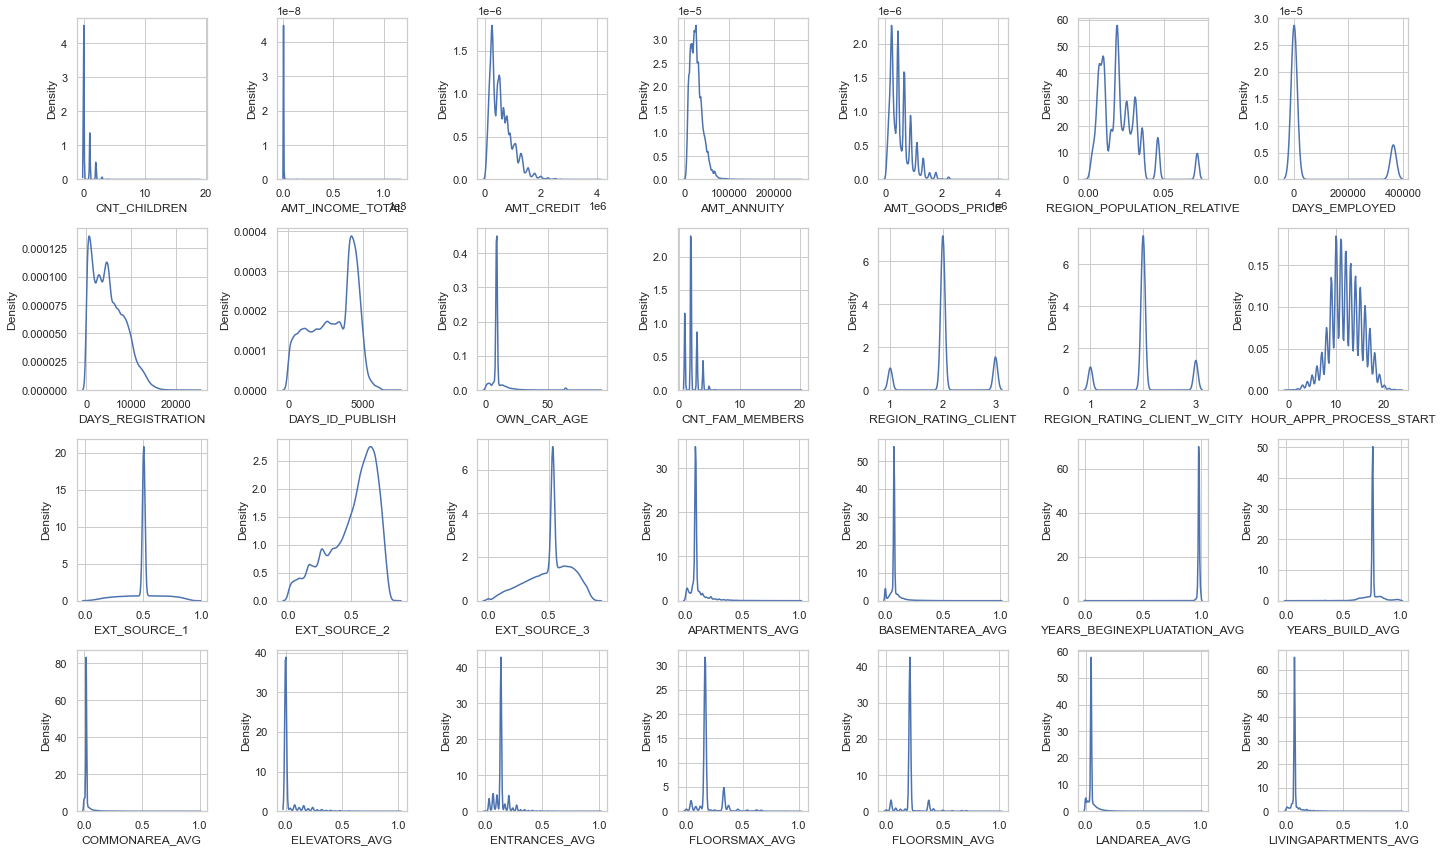

In [50]:
plt.figure(figsize=(20,12))

selected_columns = num_a[:28]  # Ambil 28 kolom pertama atau sesuai kebutuhan
for i, column in enumerate(selected_columns, 1):
    plt.subplot(4,7,i)
    sns.kdeplot(data=num[num_a], x=num[column])
    plt.tight_layout()

plt.show()

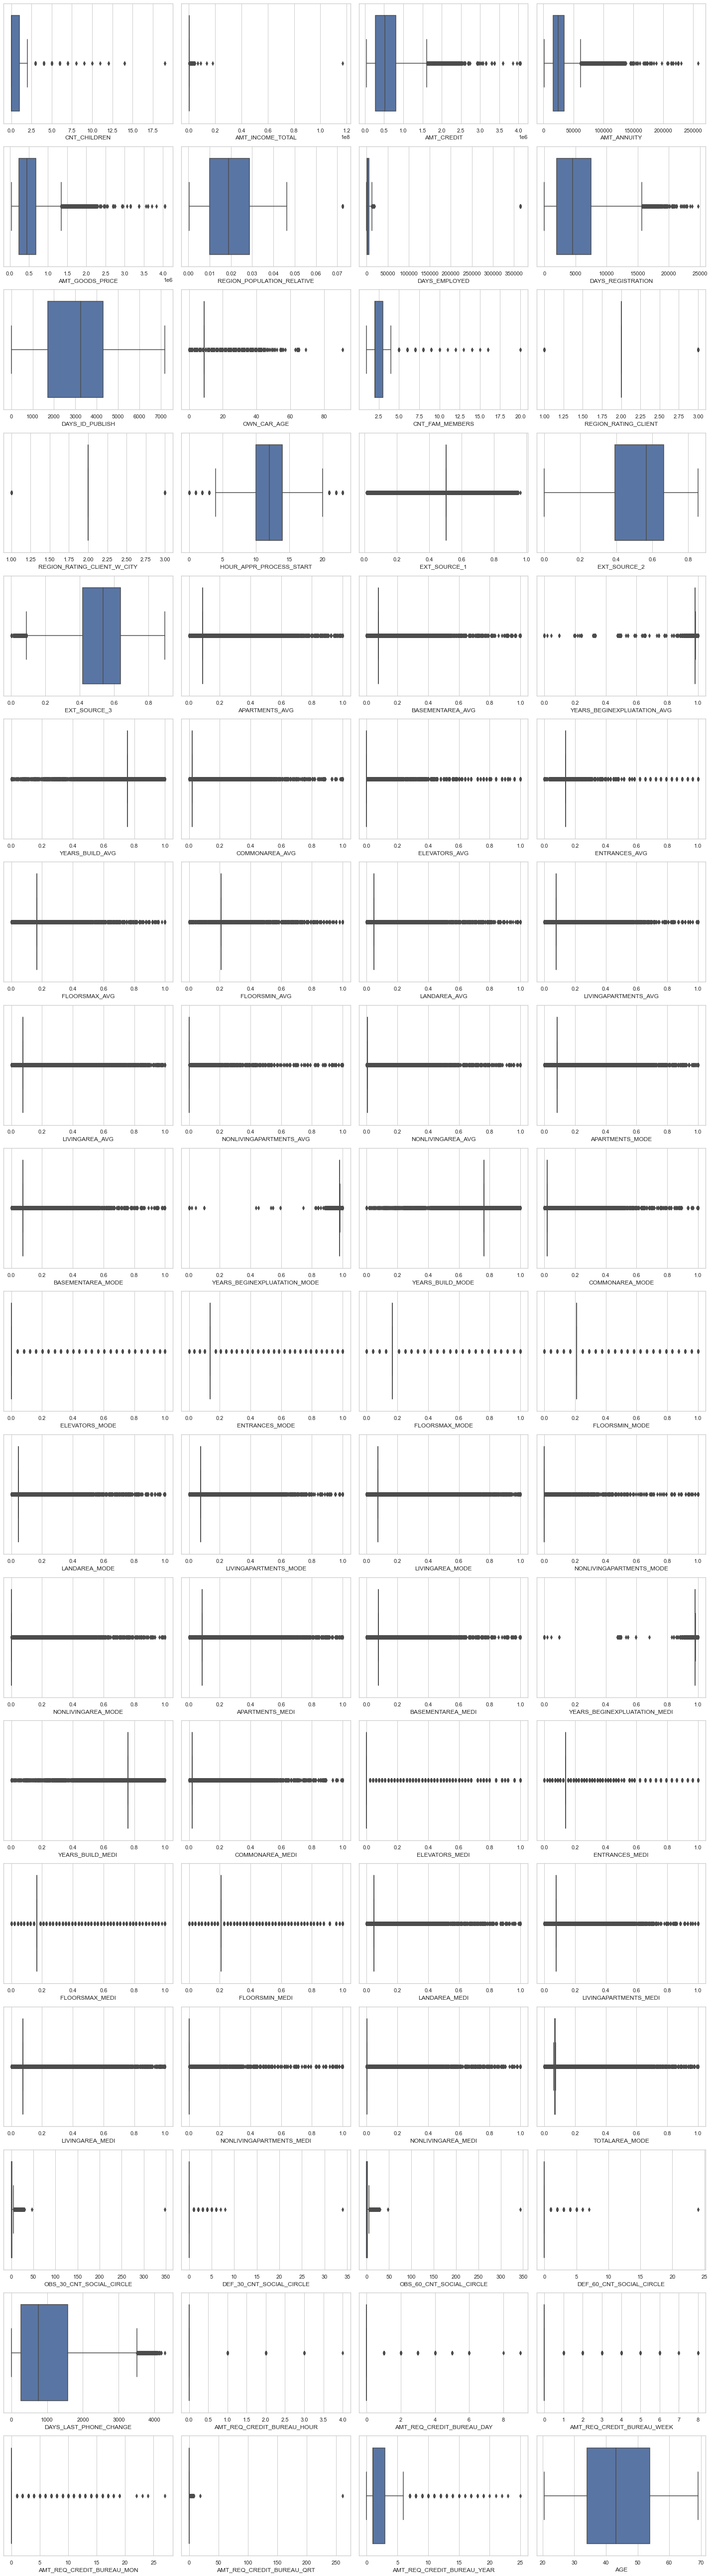

In [51]:
num_a_chunks = [num_a[i:i+4] for i in range(0, len(num_a), 4)]
num_plots = len(num_a_chunks)

plt.figure(figsize=(20, num_plots * 4))

for plot_num, num_chunk in enumerate(num_a_chunks, 1):
    for i, column in enumerate(num_chunk, 1):
        plt.subplot(num_plots, 4, i + (plot_num - 1) * 4)
        sns.boxplot(data=num[num_chunk], x=column)
        plt.tight_layout()

plt.show()


In [52]:
print(f'Row before delete outlier at CNT_children :  {len(df)}')

filtered_entries = np.array([True] * len(df))

zscore = abs(stats.zscore(df['CNT_CHILDREN'])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Row after delete outlier at CNT_children : {len(df)}')

Row before delete outlier at CNT_children :  307511
Row after delete outlier at CNT_children : 303239


In [53]:
x = df.drop(columns = 'TARGET', axis=1)
num = x[num_a]

In [54]:
num_mean = num.mean()
num_std = num.std()

num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,-0.459710,0.385831,0.577304,-0.145438,...,0.252564,5.254914,-0.206172,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,-1.509510
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.463592,1.083617,1.789288,-0.145438,...,-0.168056,-0.275683,0.163731,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.158701
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.456807,0.212377,0.304955,2.249374,...,-0.588676,-0.275683,0.179446,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.679674
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.476632,-1.367137,0.367244,-0.145438,...,0.252564,-0.275683,0.418795,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,0.670310
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.476625,0.197922,-0.309320,-0.145438,...,-0.588676,-0.275683,-0.172324,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.882034


In [55]:
num_1 = x[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num = pd.concat([num, num_1], axis=1)
num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,-0.459710,0.385831,0.577304,-0.145438,...,0,1,1,0,0,0,0,0,0,0
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.463592,1.083617,1.789288,-0.145438,...,0,1,1,0,0,0,0,0,0,0
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.456807,0.212377,0.304955,2.249374,...,1,1,1,0,0,0,0,0,0,0
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.476632,-1.367137,0.367244,-0.145438,...,0,1,0,0,0,0,0,0,0,0
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.476625,0.197922,-0.309320,-0.145438,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.589198,-0.047118,-0.855088,0.032003,-0.848093,0.843848,-0.456884,-0.976864,0.668749,-0.145438,...,0,1,0,0,0,0,0,0,0,0
307507,-0.589198,-0.405740,-0.818198,-1.042382,-0.848093,0.309175,2.118014,0.176098,-0.728114,-0.145438,...,0,1,1,0,0,0,0,0,0,0
307508,-0.589198,-0.065993,0.195641,0.199205,0.126562,-1.148184,-0.511027,-0.489661,-1.430522,-0.145438,...,0,1,0,1,0,0,0,0,1,1
307509,-0.589198,0.009507,-0.568393,-0.475821,-0.592246,-1.125704,-0.488940,0.693628,1.365193,-0.145438,...,0,1,0,0,0,0,0,1,1,0


In [56]:
obj = x.select_dtypes(include='object')
df_obj = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
df_obj = df_obj.rename(columns = {'index' : 'Name_of_column'})

obj_1 = []
obj_2 = []
for i,y in enumerate(df_obj.Name_of_column):
    if df_obj['Total_unique'][i] > 2:
        obj_1.append(y)
    else:
        obj_2.append(y)
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,EMPLOYMENT_DURATION,Age_category
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Kerja Aktif,Young Adult
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Kerja Aktif,Adult
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Panel,No,Kerja Aktif,Older
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No,Kerja Aktif,Older
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Panel,No,Kerja Aktif,Older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Unmarried,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No,Kerja Aktif,Young Adult
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Unmarried,House / apartment,Laborers,MONDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Pensiunan,Older
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Unmarried,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No,Kerja Aktif,Adult
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,reg oper account,block of flats,"Stone, brick",No,Kerja Aktif,Young Adult


In [57]:
for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)
    
obj = obj.drop(columns = obj_1)

In [58]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])
    
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,EMERGENCYSTATE_MODE,EMPLOYMENT_DURATION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,Age_category_Adult,Age_category_Older,Age_category_Young Adult
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
307507,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
307508,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
307509,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [59]:
df_train = pd.concat([num, obj], axis=1)

In [60]:
df = pd.concat([df_train, df['TARGET']],axis=1)

In [61]:
x = df.drop(columns = 'TARGET')
y = df['TARGET']

In [62]:
sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x, y.ravel())

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)

In [64]:
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x, y.ravel())

In [65]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_under, y_under, test_size=0.3, random_state=42)

### Train Logistic Regression Model

In [66]:
def confusionmatrix(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     83391
           1       0.99      0.90      0.94     83915

    accuracy                           0.95    167306
   macro avg       0.95      0.95      0.95    167306
weighted avg       0.95      0.95      0.95    167306



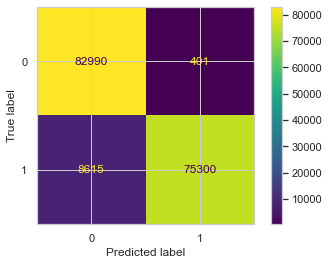

In [67]:
lr1 = LogisticRegression()
lr1.fit(x_train, y_train.ravel())
predictions = lr1.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    195452
           1       1.00      0.90      0.94    194928

    accuracy                           0.95    390380
   macro avg       0.95      0.95      0.95    390380
weighted avg       0.95      0.95      0.95    390380



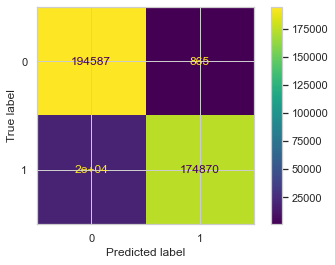

In [68]:
predictions = lr1.predict(x_train)
  
# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      7289
           1       0.69      0.67      0.68      7349

    accuracy                           0.68     14638
   macro avg       0.68      0.68      0.68     14638
weighted avg       0.68      0.68      0.68     14638



c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


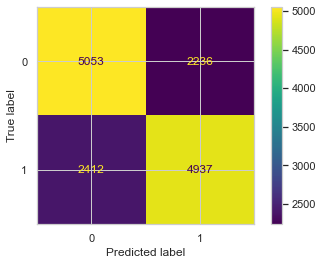

In [69]:
lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2)
predictions2 = lr2.predict(x_test2)
  
# print classification report
print(classification_report(y_test2, predictions2))
confusionmatrix(predictions2, y_test2)

              precision    recall  f1-score   support

           0       0.68      0.69      0.69     17107
           1       0.68      0.67      0.68     17047

    accuracy                           0.68     34154
   macro avg       0.68      0.68      0.68     34154
weighted avg       0.68      0.68      0.68     34154



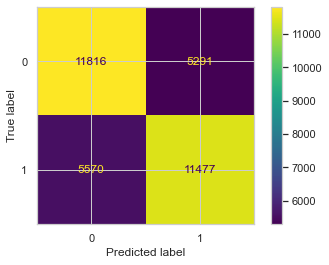

In [70]:
predictions = lr2.predict(x_train2)
  
# print classification report
print(classification_report(y_train2, predictions))
confusionmatrix(predictions, y_train2)

In [71]:
# Make predictions using the trained model
predictions = lr1.predict(x_test)

# Print the predicted target labels
print(predictions)

[0 1 0 ... 1 1 0]


Train Data:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    195452
           1       1.00      0.90      0.94    194928

    accuracy                           0.95    390380
   macro avg       0.95      0.95      0.95    390380
weighted avg       0.95      0.95      0.95    390380



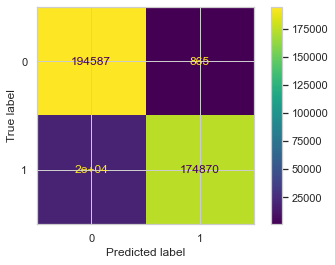

In [72]:
train_predictions = lr1.predict(x_train)
print("Train Data:")
print(classification_report(y_train, train_predictions))
confusionmatrix(train_predictions, y_train)


Test Data:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     83391
           1       0.99      0.90      0.94     83915

    accuracy                           0.95    167306
   macro avg       0.95      0.95      0.95    167306
weighted avg       0.95      0.95      0.95    167306



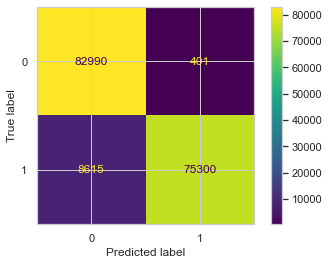

In [73]:
test_predictions = lr1.predict(x_test)
print("Test Data:")
print(classification_report(y_test, test_predictions))
confusionmatrix(test_predictions, y_test)


In [74]:
import pandas as pd

# Create a DataFrame to display actual and predicted data
result_table = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predictions
})

# Display the result_table
print(result_table)


        Actual  Predicted
0            1          0
1            1          1
2            0          0
3            1          1
4            1          1
...        ...        ...
167301       1          1
167302       1          1
167303       1          1
167304       1          1
167305       0          0

[167306 rows x 2 columns]


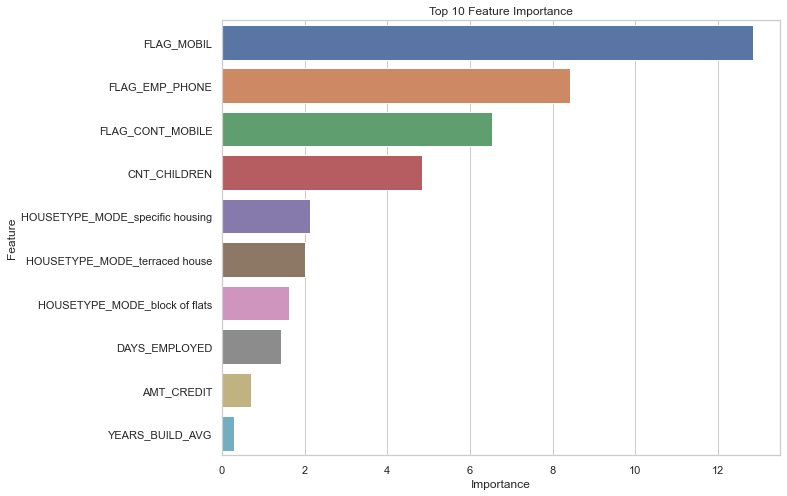

                             Feature  Importance
72                        FLAG_MOBIL   12.852317
73                    FLAG_EMP_PHONE    8.415298
75                  FLAG_CONT_MOBILE    6.539072
0                       CNT_CHILDREN    4.831117
204  HOUSETYPE_MODE_specific housing    2.135123
205    HOUSETYPE_MODE_terraced house    2.003756
203    HOUSETYPE_MODE_block of flats    1.634105
6                      DAYS_EMPLOYED    1.434860
2                         AMT_CREDIT    0.695507
20                   YEARS_BUILD_AVG    0.290937


In [75]:
feature_importance = lr1.coef_[0]

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Plot the feature importance for the top 10 features
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_features, x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(top_10_features)


# Business Recomendation

1. FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_CONT_MOBILE:

Bisnis dapat memberikan penawaran khusus atau layanan terkait ponsel, telepon kantor, atau layanan seluler kepada pelanggan yang memiliki fitur ini aktif. Ini bisa termasuk paket data khusus, penawaran ponsel dengan cicilan yang lebih mudah, atau layanan panggilan khusus.

2. CNT_CHILDREN:

Home Credit dapat merancang program pinjaman khusus atau produk layanan keuangan yang sesuai dengan kebutuhan keluarga, seperti pinjaman pendidikan anak-anak atau perlindungan asuransi kesehatan keluarga.

3. HOUSETYPE_MODE_terraced house, HOUSETYPE_MODE_specific housing, HOUSETYPE_MODE_block of flats:

Berdasarkan jenis hunian, Home Credit dapat menyesuaikan penawaran produk atau layanan. Misalnya, pelanggan yang tinggal di rumah bertingkat mungkin lebih tertarik pada layanan renovasi atau perbaikan rumah, sementara pelanggan yang tinggal di apartemen mungkin lebih membutuhkan layanan keuangan yang berfokus pada biaya sehari-hari.

4. DAYS_EMPLOYED:

Home Credit dapat menyediakan program pinjaman atau produk asuransi yang disesuaikan dengan tahap karir pelanggan. Misalnya, pelanggan dengan pengalaman kerja lebih lama mungkin lebih cocok untuk produk yang lebih besar, seperti hipotek atau pinjaman bisnis.

5. AMT_CREDIT:

Berdasarkan jumlah kredit yang dimiliki oleh pelanggan, Home Credit dapat menawarkan produk pinjaman yang sesuai dengan kebutuhan dan kemampuan pembayaran pelanggan. Misalnya, pelanggan dengan jumlah kredit lebih besar mungkin lebih tertarik pada pinjaman jangka panjang, sedangkan pelanggan dengan jumlah kredit lebih kecil mungkin mencari solusi pendekatan.

6. YEARS_BUILD_AVG:

Home Credit dapat merancang produk atau layanan yang sesuai dengan tahap umur bangunan pelanggan. Ini bisa termasuk pinjaman renovasi atau perbaikan rumah untuk pelanggan dengan bangunan yang lebih tua, atau penawaran perlindungan asuransi properti untuk bangunan yang lebih baru.